Name:- Sourabh Solanki
Batch:- DS2403

# Titanic Survived Project

Project Description:- 
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [58]:
#Importaning neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [59]:
# import/Load Dataset
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
#lets some explore the data set by Performing EDA
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
#fil missing values for Age with mean
df['Age'].fillna(df['Age'].mean(), inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [64]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
#Lets Exclude non numerical columns from dataset
num_columns = df.select_dtypes(include = [np.number]).columns
num_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [67]:
# Lets Check Correlation data
corr = df[num_columns].corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


# Visualization 

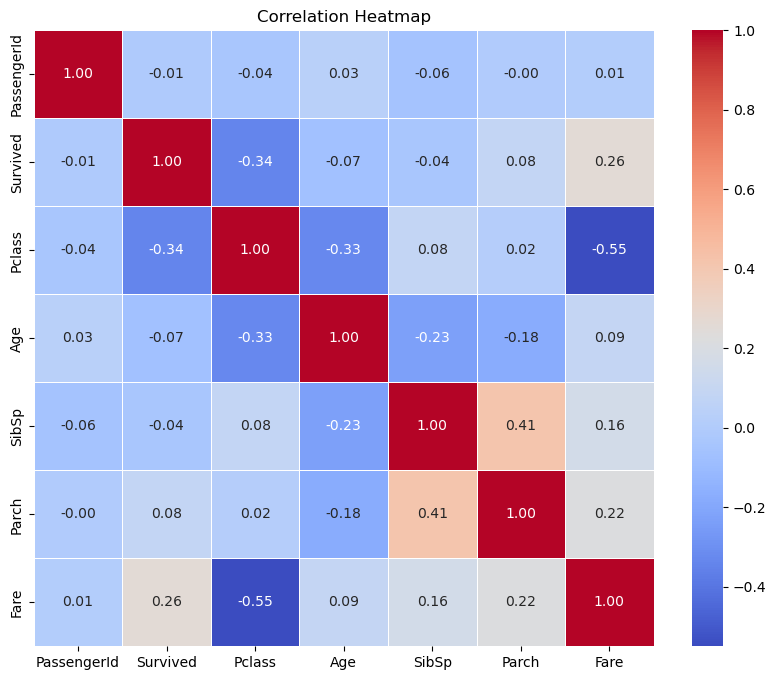

In [68]:
# Creat heat Map to analys the  correlation between Data Set
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

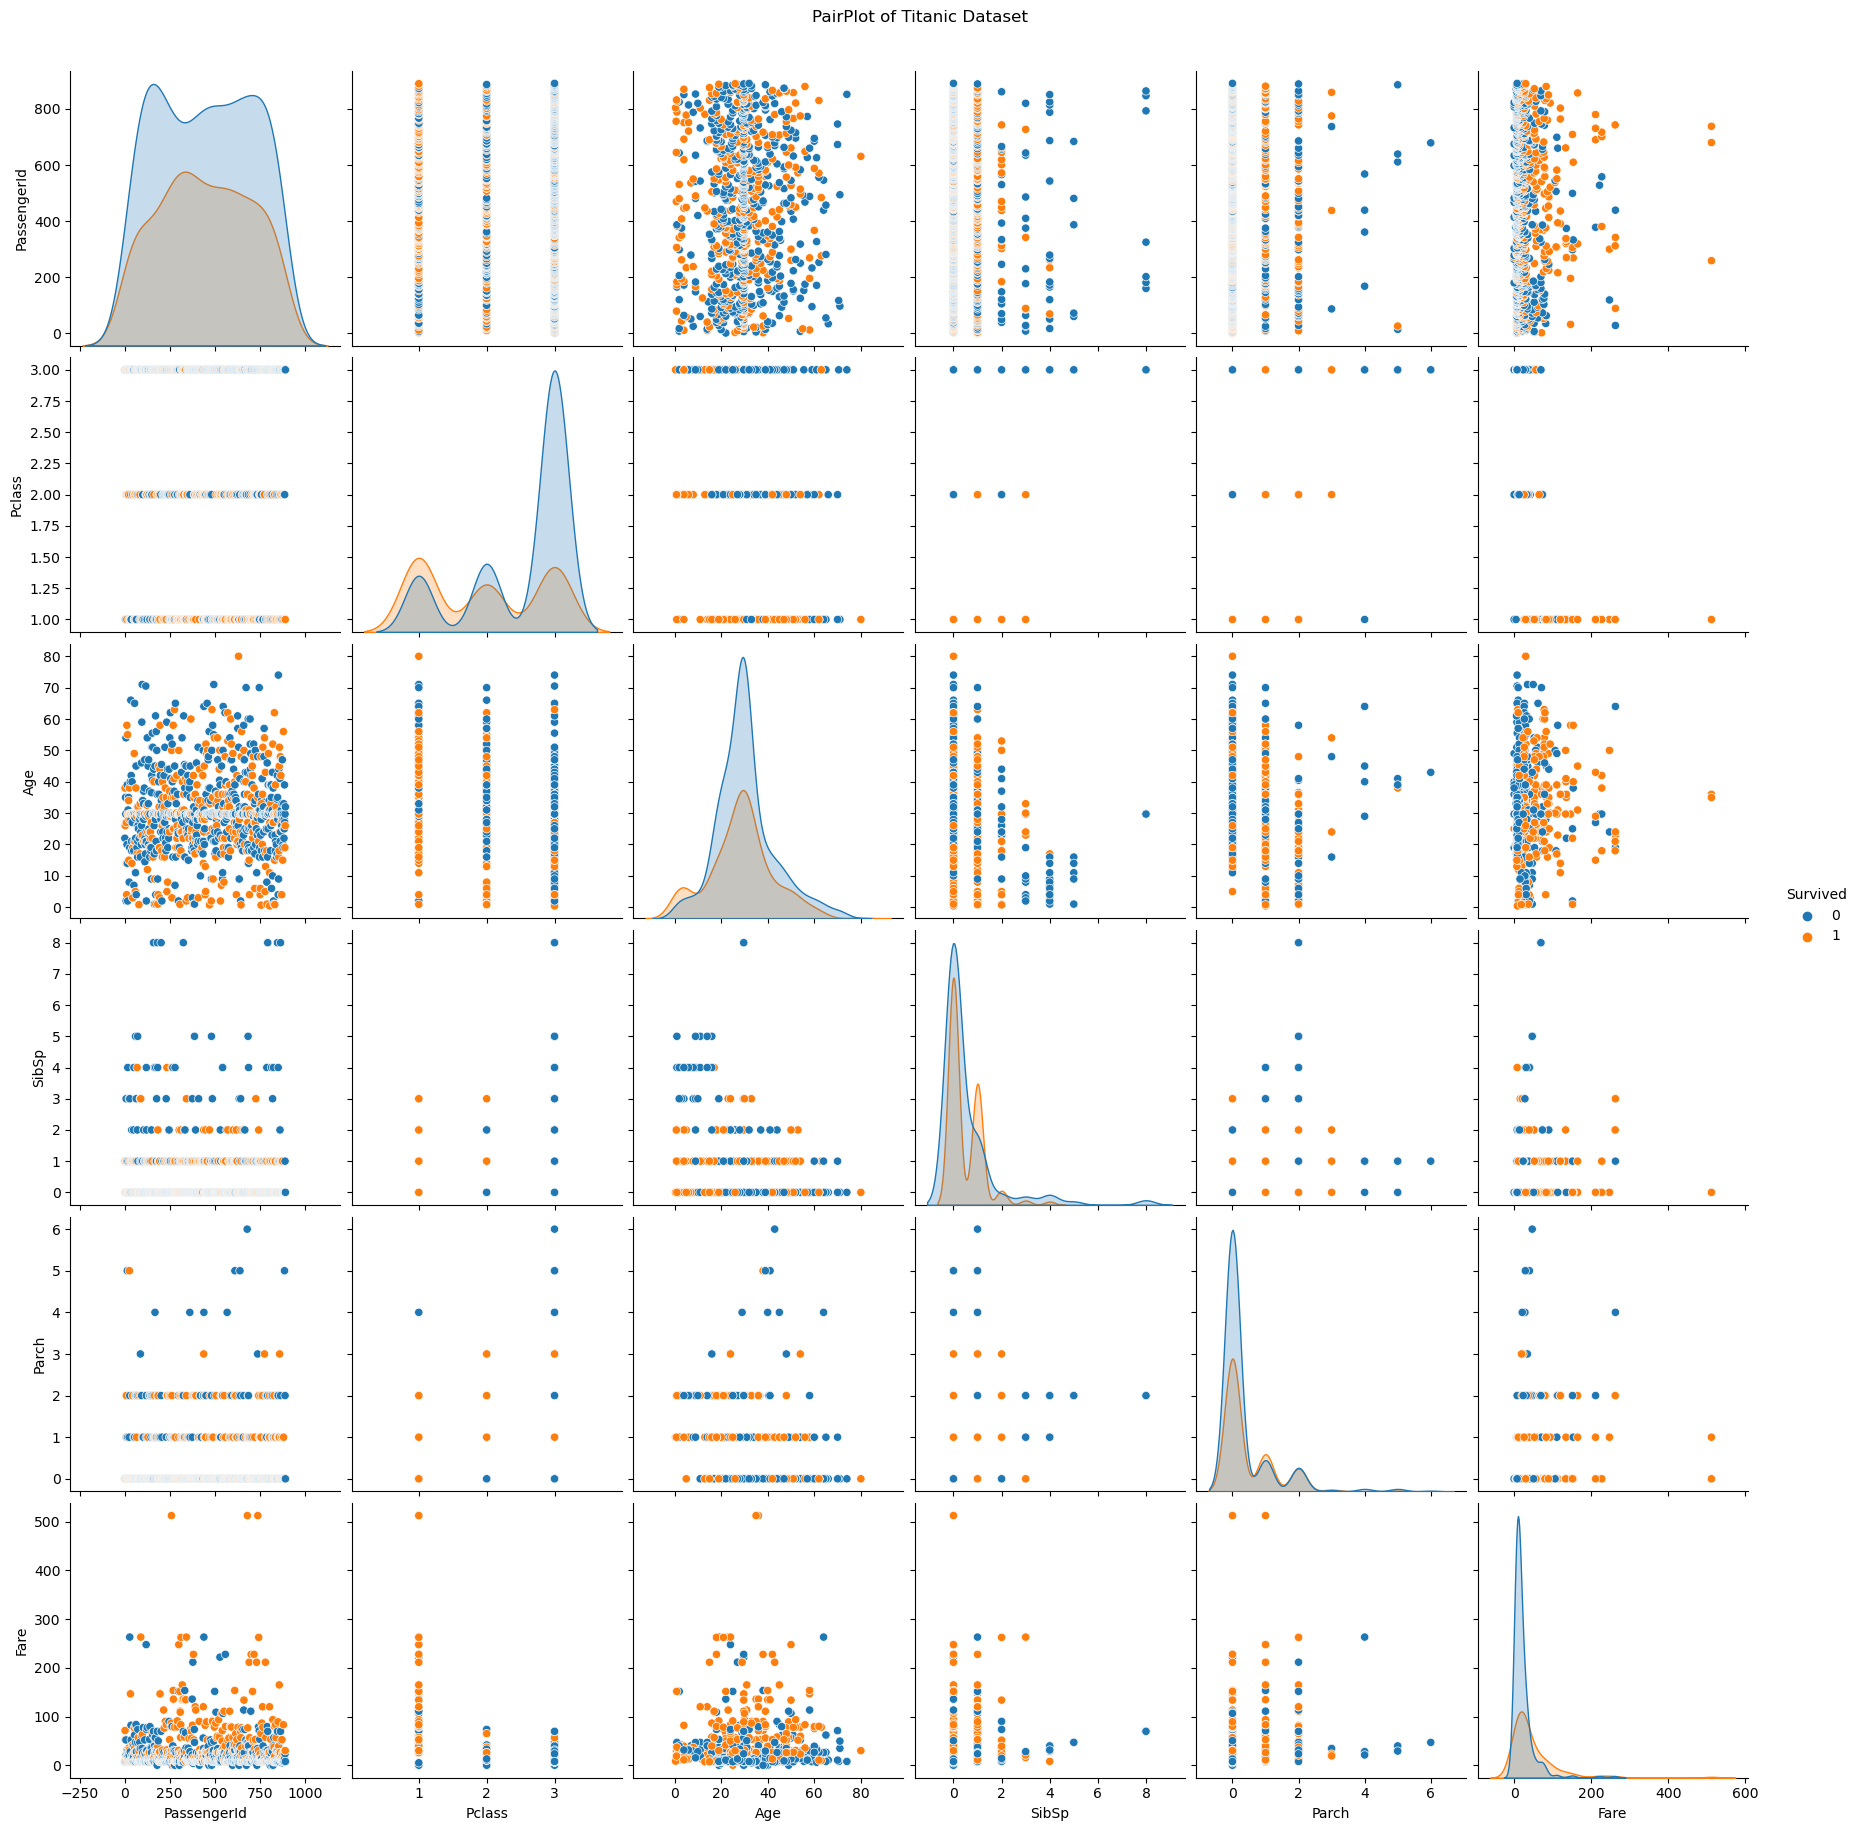

In [69]:
# Creating Pair Plot to visualize relationship b/w data set
sns.pairplot(df, hue = 'Survived', height = 3)
plt.suptitle('PairPlot of Titanic Dataset', y = 1.02)
plt.show()

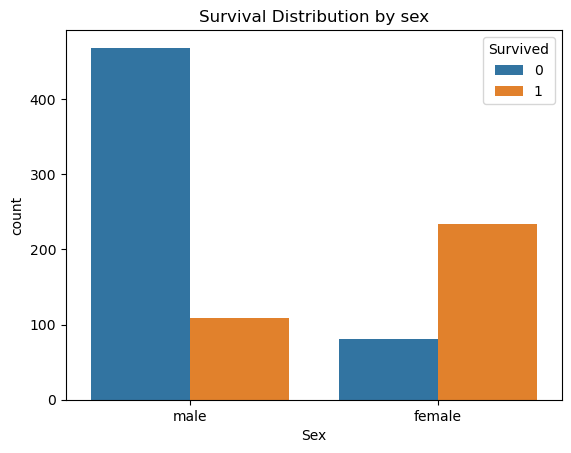

In [70]:
# Distribution of survival by sex 
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.title('Survival Distribution by sex')
plt.show()

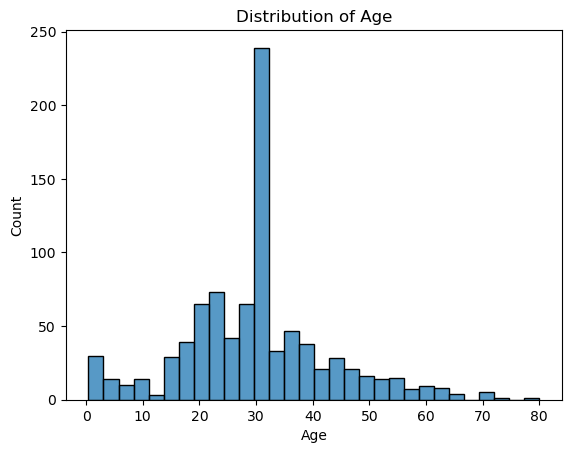

In [71]:
# Distribution by Age
sns.histplot(df['Age'].dropna(), kde = False, bins = 30)
plt.title('Distribution of Age')
plt.show()

In [72]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [73]:
# Now converting categorical variable to numerical 
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,1.0


In [74]:
#feature Scaling for training model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']
X,y

(     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0         3    0  22.000000      1      0   7.2500       0.0
 1         1    1  38.000000      1      0  71.2833       1.0
 2         3    1  26.000000      0      0   7.9250       0.0
 3         1    1  35.000000      1      0  53.1000       0.0
 4         3    0  35.000000      0      0   8.0500       0.0
 ..      ...  ...        ...    ...    ...      ...       ...
 886       2    0  27.000000      0      0  13.0000       0.0
 887       1    1  19.000000      0      0  30.0000       0.0
 888       3    1  29.699118      1      2  23.4500       0.0
 889       1    0  26.000000      0      0  30.0000       1.0
 890       3    0  32.000000      0      0   7.7500       2.0
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

# Modeling (Random Forest Classifier)

In [75]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test

(     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
 331       1    0  45.500000      0      0   28.5000       0.0
 733       2    0  23.000000      0      0   13.0000       0.0
 382       3    0  32.000000      0      0    7.9250       0.0
 704       3    0  26.000000      1      0    7.8542       0.0
 813       3    1   6.000000      4      2   31.2750       0.0
 ..      ...  ...        ...    ...    ...       ...       ...
 106       3    1  21.000000      0      0    7.6500       0.0
 270       1    0  29.699118      0      0   31.0000       0.0
 860       3    0  41.000000      2      0   14.1083       0.0
 435       1    1  14.000000      1      2  120.0000       0.0
 102       1    0  21.000000      0      1   77.2875       0.0
 
 [712 rows x 7 columns],
      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 709       3    0  29.699118      1      1  15.2458       1.0
 439       2    0  31.000000      0      0  10.5000       0.0
 840       3    0  20.000000   

In [76]:
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(X_train)

SimpleImputer()

In [77]:
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [78]:
# Intialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [79]:
#predict on test set
y_pred = model.predict(X_test_imputed)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [80]:
#lets Evaluting tha Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8212290502793296


In [81]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [82]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[92 13]
 [19 55]]


# ------------------------Thank You----------------------------------